# #The plots made using Plotly Express(px) won't appear in the Github

#  Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Importing dataset

In [2]:
url = 'C:/Users/harshpreet/Desktop/Delhi_air_quality_analysis/Air_quality_data_India(2015-2020).csv'
Day_data = pd.read_csv(url)
Day_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
Delhi_data = Day_data[Day_data['City']=='Delhi']
Delhi_data.reset_index(inplace=True)
Delhi_data.drop('index', axis=1 , inplace=True)
Delhi_data.head()

C:\Users\harshpreet\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


# Handling Missing values

In [4]:
Delhi_data.isnull().sum()

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

Imputation using interpolation

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [5]:
Delhi_data.interpolate(limit_direction='both', inplace=True)

<ipython-input-5-3b1b6941a6a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi_data.interpolate(limit_direction='both', inplace=True)


In [80]:
Delhi_data.isnull().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket    10
dtype: int64

In [6]:
# manually handling the missing values of AQI bucket

for i in range(len(Delhi_data)):
    if pd.isnull(Delhi_data['AQI_Bucket'][i])==True:
        if Delhi_data['AQI'][i]>0.0 and Delhi_data['AQI'][i]<=50.0:
            Delhi_data['AQI_Bucket'][i]='Good'
            
        elif Delhi_data['AQI'][i]>50.0 and Delhi_data['AQI'][i]<=100.0:
            Delhi_data['AQI_Bucket'][i]='Satisfactory'
            
        elif Delhi_data['AQI'][i]>100.0 and Delhi_data['AQI'][i]<=200.0:
            Delhi_data['AQI_Bucket'][i]='Moderate'
            
        elif Delhi_data['AQI'][i]>200.0 and Delhi_data['AQI'][i]<=300.0:
            Delhi_data['AQI_Bucket'][i]='Poor'
            
        elif Delhi_data['AQI'][i]>300.0 and Delhi_data['AQI'][i]<=400:
            Delhi_data['AQI_Bucket'][i]='Very Poor'
            
        else: Delhi_data['AQI_Bucket'][i]='Severe'
            

<ipython-input-6-2c19779fac03>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi_data['AQI_Bucket'][i]='Moderate'
C:\Users\harshpreet\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-6-2c19779fac03>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi_data['AQI_Bucket'][i]='Good'
<ipython-input-6-2c19

In [82]:
Delhi_data.isnull().sum()
# data is ready for analysis

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [7]:
# As most of the analysis will be based upon the time period of our quality, therefore we have to manage our date column

Delhi_data['Date'].dtype

dtype('O')

In [8]:
#changing date's data-type

Delhi_data['Date']=pd.to_datetime(Delhi_data['Date'])
Delhi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2009 non-null   float64       
 3   PM10        2009 non-null   float64       
 4   NO          2009 non-null   float64       
 5   NO2         2009 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2009 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         2009 non-null   float64       
 10  O3          2009 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      2009 non-null   float64       
 14  AQI         2009 non-null   float64       
 15  AQI_Bucket  2009 non-null   object        
dtypes: datetime64[ns](1), fl

<ipython-input-8-b4fb13729998>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi_data['Date']=pd.to_datetime(Delhi_data['Date'])


# Data Analysis

Overall AQI comparasion for different years

In [54]:
px.line(data_frame=Delhi_data, x='Date', y='AQI')

Comparing the daily values of AQI with the monthly mean values

In [10]:
#creating dataframe to have the monthly mean values of the AQI

pltdata=pd.DataFrame()
pltdata['Date']=Delhi_data['Date']
pltdata['AQI']=Delhi_data['AQI']
pltdata.set_index('Date', inplace=True)

In [50]:
df=pd.DataFrame(pltdata['AQI'].resample('M').mean())
df.head()

,AQI
Date,
2015-01-31,342.290323
2015-02-28,327.928571
2015-03-31,256.064516
2015-04-30,305.266667
2015-05-31,348.580645


In [12]:
df.rename(columns={'AQI':'Average monthly AQI'}, inplace=True)


In [13]:
df.reset_index(inplace=True)
df.head()

,Date,Average monthly AQI
0,2015-01-31,342.290323
1,2015-02-28,327.928571
2,2015-03-31,256.064516
3,2015-04-30,305.266667
4,2015-05-31,348.580645


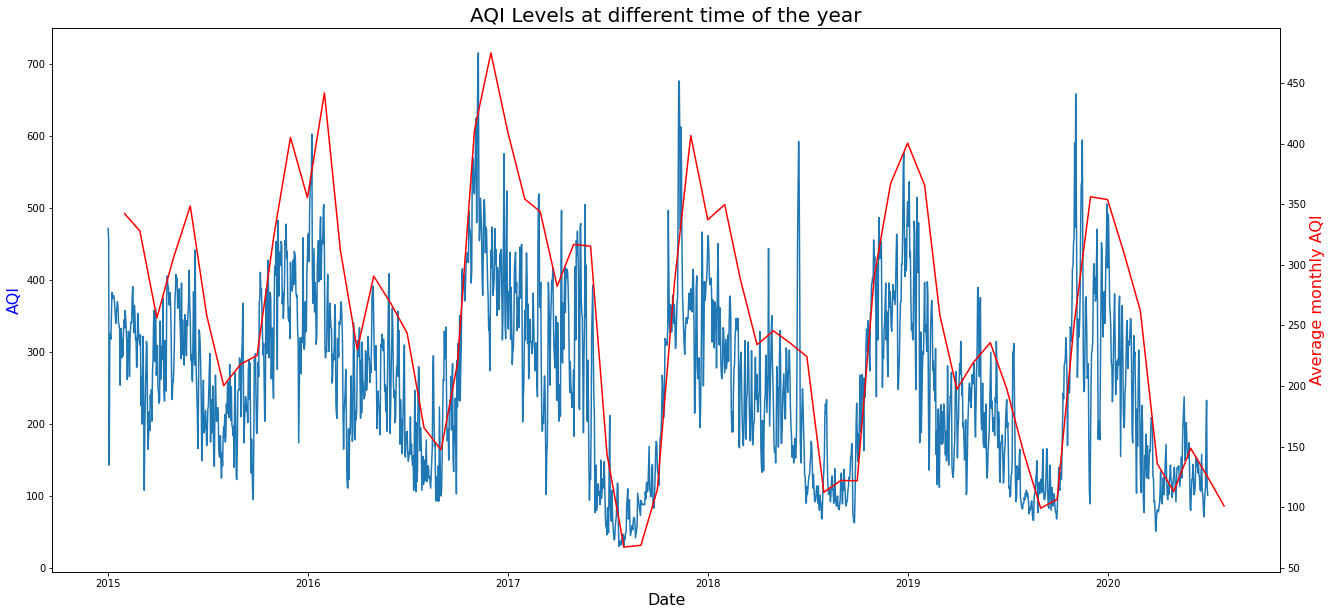

In [14]:
fig, ax = plt.subplots(figsize=(22,10))
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Daily AQI', fontsize=16, color='blue')
ax2=ax.twinx()
ax2.set_ylabel('Monthly mean AQI', fontsize=16, color='red')
plt.title('AQI Levels at different time of the year', fontsize=20)
sns.lineplot(x='Date',y='AQI',data=Delhi_data, ax=ax)
sns.lineplot(x='Date', y='Average monthly AQI', data=df, ax=ax2, color='red')

Variation of different pollutants for the year 2019

In [16]:
df2=Delhi_data.copy()
df2['Year']=Delhi_data['Date'].dt.year
df2['Month']=Delhi_data['Date'].dt.month
df2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,1
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,1
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,1
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,1


Text(0.5, 1.0, 'SO2')

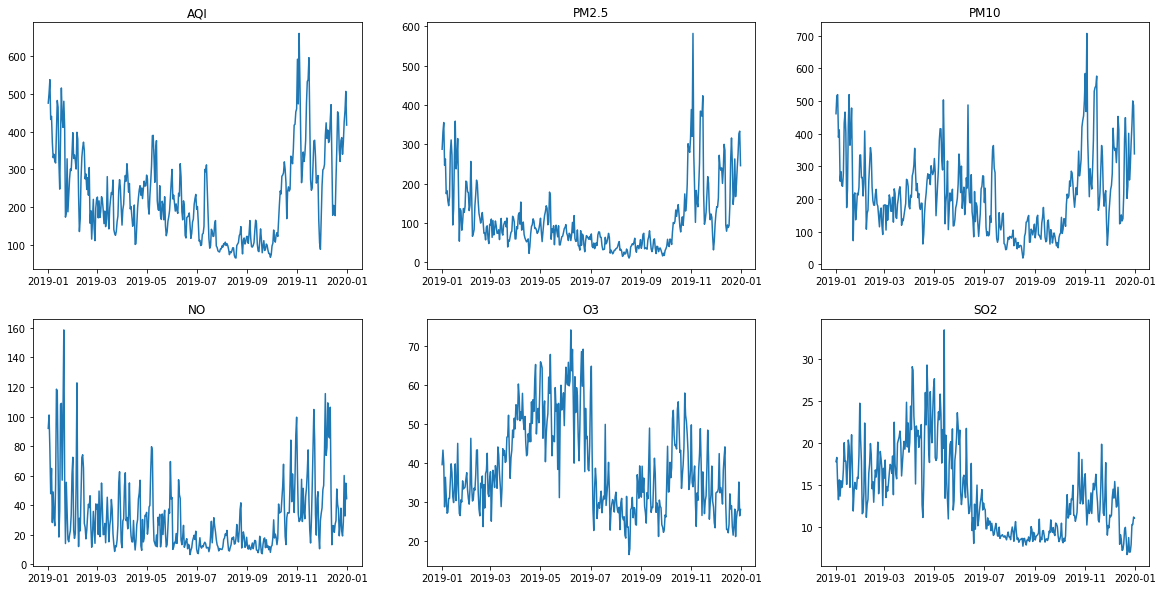

In [52]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
ax1.plot(df2['Date'][df2['Year']==2019],df2['AQI'][df2['Year']==2019])
ax1.set_title('AQI')
ax2.plot(df2['Date'][df2['Year']==2019],df2['PM2.5'][df2['Year']==2019])
ax2.set_title('PM2.5')
ax3.plot(df2['Date'][df2['Year']==2019],df2['PM10'][df2['Year']==2019])
ax3.set_title('PM10')
ax4.plot(df2['Date'][df2['Year']==2019],df2['NO'][df2['Year']==2019])
ax4.set_title('NO')
ax5.plot(df2['Date'][df2['Year']==2019],df2['O3'][df2['Year']==2019])
ax5.set_title('O3')
ax6.plot(df2['Date'][df2['Year']==2019],df2['SO2'][df2['Year']==2019])
ax6.set_title('SO2')


# Lockdown effects on the Pollution levels 

Comparing the values of 2019 and 2020 data for different pollutants especially in the lockown period

In [18]:
#making a table for the data of 2019 and 2020(combined) and isolated tables for the months of March to June for both the years

Delhi_19_20=pd.concat([df2[df2['Year']==2019], df2[df2['Year']==2020]], axis=0)

In [19]:
Delhi_19_20.reset_index(inplace=True)
Delhi_19_20.drop('index', axis=1 , inplace=True)

In [20]:
Delhi_19_20.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Delhi,2019-01-01,287.34,461.02,92.04,69.46,121.07,56.66,2.54,17.77,39.58,8.09,48.84,2.21,475.0,Severe,2019,1
1,Delhi,2019-01-02,331.20,515.72,101.08,75.06,133.85,63.63,2.78,18.27,43.30,10.04,58.70,2.42,501.0,Severe,2019,1
2,Delhi,2019-01-03,355.40,519.34,77.92,66.20,106.99,61.02,2.55,15.12,39.77,8.91,56.57,3.28,537.0,Severe,2019,1
3,Delhi,2019-01-04,246.46,388.79,47.83,57.53,74.39,53.09,2.01,13.22,28.75,6.78,40.50,0.93,432.0,Severe,2019,1
4,Delhi,2019-01-05,262.53,411.49,64.97,60.35,90.67,56.49,2.23,15.59,36.33,8.50,51.69,1.29,440.0,Severe,2019,1


In [21]:
#displaying all rows of the table

pd.options.display.max_rows=None

In [22]:
#making the table for the data of 2019 and 2020 from March to June

Delhi_mar_june_19=Delhi_19_20[(Delhi_19_20['Month'].isin([3,4,5,6])) & (Delhi_19_20['Year']==2019)]
Delhi_mar_june_19.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
59,Delhi,2019-03-01,93.83,181.26,37.55,48.87,60.61,30.20,1.17,15.81,37.75,3.02,33.92,0.72,222.0,Poor,2019,3
60,Delhi,2019-03-02,109.60,182.54,40.68,62.05,70.66,36.48,1.36,17.96,25.07,4.51,41.24,1.45,227.0,Poor,2019,3
61,Delhi,2019-03-03,62.92,105.16,20.21,40.61,41.09,30.98,1.16,13.48,33.59,2.32,25.83,0.73,172.0,Moderate,2019,3
62,Delhi,2019-03-04,105.93,180.84,49.62,40.10,67.55,37.26,1.54,14.75,38.13,3.92,33.07,0.98,217.0,Poor,2019,3
63,Delhi,2019-03-05,68.86,135.40,18.77,40.05,37.94,28.71,1.01,14.26,36.30,2.73,21.24,0.33,173.0,Moderate,2019,3


In [23]:
Delhi_mar_june_20=Delhi_19_20[(Delhi_19_20['Month'].isin([3,4,5,6])) & (Delhi_19_20['Year']==2020)]
Delhi_mar_june_20.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
425,Delhi,2020-03-01,42.83,91.88,20.57,40.73,41.36,31.40,0.97,12.19,39.84,2.18,22.27,7.59,105.0,Moderate,2020,3
426,Delhi,2020-03-02,99.34,203.51,64.58,50.23,85.92,39.78,1.58,15.81,36.64,4.58,37.92,4.39,192.0,Moderate,2020,3
427,Delhi,2020-03-03,86.26,188.73,50.52,46.60,71.98,37.02,1.22,15.48,32.39,3.98,39.09,1.51,226.0,Poor,2020,3
428,Delhi,2020-03-04,82.90,193.79,40.18,45.62,60.78,37.32,1.10,16.22,41.77,3.57,28.32,0.66,200.0,Moderate,2020,3
429,Delhi,2020-03-05,31.43,67.50,11.78,32.97,28.54,32.27,0.81,11.32,36.98,1.81,16.39,0.27,112.0,Moderate,2020,3


# Pattern of PM2.5 in 2019 and 2020

In [24]:
px.line(data_frame=Delhi_19_20, x='Date', y='PM2.5')


Effect of Lockdown on PM2.5 levels

In [25]:
fig= go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['PM2.5'],mode='lines+markers',
                         name='PM2.5 levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['PM2.5'], mode='lines+markers',
                         name='PM2.5 levels of 2020'))     
fig.update_layout(title='PM2.5 variation during lockdown')
fig.show()


# Pattern of PM10 in 2019 and 2020

In [26]:
px.line(data_frame=Delhi_19_20, x='Date', y='PM10')

Effect of Lockdown on PM10 levels

In [27]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['PM10'], mode='lines+markers',
                         name='PM10 levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['PM10'], mode='lines+markers',
                         name='PM10 levels of 2020'))
fig.update_layout(title='PM10 variation during lockdown')
fig.show()

# Pattern of NO in 2019 and 2020

In [28]:
px.line(data_frame=Delhi_19_20, x='Date', y='NO')

Effect of Lockdown on NO levels

In [29]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['NO'], mode='lines+markers',
                         name='NO levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['NO'], mode='lines+markers',
                         name='NO levels of 2020'))
fig.update_layout(title='NO variation during lockdown')
fig.show()

# Pattern of NO2 in 2019 and 2020

In [30]:
px.line(data_frame=Delhi_19_20, x='Date', y='NO2')

Effect of Lockdown on NO2 levels

In [31]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['NO2'], mode='lines+markers',
                         name='NO2 levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['NO2'], mode='lines+markers',
                         name='NO2 levels of 2020'))
fig.update_layout(title='NO2 variation during lockdown')
fig.show()

# Pattern of NH3 in 2019 and 2020

In [32]:
px.line(data_frame=Delhi_19_20, x='Date', y='NH3')

Effect of Lockdown on NH3 levels

In [33]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['NH3'], mode='lines+markers',
                         name='NH3 levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['NH3'], mode='lines+markers',
                         name='NH3 levels of 2020'))
fig.update_layout(title='NH3 variation during lockdown')
fig.show()

# Pattern of CO in 2019 and 2020

In [34]:
px.line(data_frame=Delhi_19_20, x='Date', y='CO')

Effect of Lockdown on CO levels

In [35]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['CO'], mode='lines+markers',
                         name='CO levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['CO'], mode='lines+markers',
                         name='CO levels of 2020'))
fig.update_layout(title='CO variation during lockdown')
fig.show()

# Pattern of SO2 in 2019 and 2020

In [36]:
px.line(data_frame=Delhi_19_20, x='Date', y='SO2')

Effect of Lockdown on SO2 levels

In [37]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['SO2'], mode='lines+markers',
                         name='SO2 levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['SO2'], mode='lines+markers',
                         name='SO2 levels of 2020'))
fig.update_layout(title='SO2 variation during lockdown')
fig.show()

# Pattern of O3 in 2019 and 2020

In [56]:
px.line(data_frame=Delhi_19_20, x='Date', y='O3')

Effect of Lockdown on O3 levels

In [39]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['O3'], mode='lines+markers',
                         name='O3 levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['O3'], mode='lines+markers',
                         name='O3 levels of 2020'))
fig.update_layout(title='O3 variation during lockdown')
fig.show()

# Pattern of Benzene in 2019 and 2020

In [40]:
px.line(data_frame=Delhi_19_20, x='Date', y='Benzene')

Effect of Lockdown on Benzene levels

In [41]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_19['Benzene'], mode='lines+markers',
                         name='Benzene levels of 2019'))
fig.add_trace(go.Scatter(x=Delhi_mar_june_19['Date'], y=Delhi_mar_june_20['Benzene'], mode='lines+markers',
                         name='Benzene levels of 2020'))
fig.update_layout(title='Benzene variation during lockdown')
fig.show()

# comapring the values of AQI based upon its severity

In [42]:
Delhi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


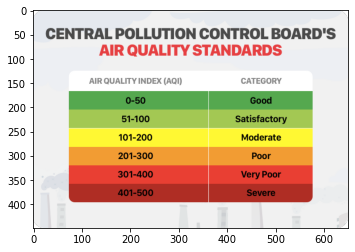

In [44]:
#Imporing an external image of Air Quality Index(AQI)

from PIL import Image
image = Image.open('C:/Users/harshpreet/Desktop/Delhi_air_quality_analysis/air_pollution_standards_cpcb.png')
plt.imshow(image)
plt.show()

In [45]:
#Getting the percentage of each AQI bucket out of all values 

for i in pd.DataFrame(Delhi_data['AQI_Bucket'].value_counts()).index:
    print('For {}% time in Delhi the Air Quality of Delhi lies under {} AQI Bucket\n'
          .format(round((len(Delhi_data[Delhi_data['AQI_Bucket']==i])/len(Delhi_data))*100,2),i))

For 26.98% time in Delhi the Air Quality of Delhi lies under Poor AQI Bucket

For 25.93% time in Delhi the Air Quality of Delhi lies under Moderate AQI Bucket

For 25.88% time in Delhi the Air Quality of Delhi lies under Very Poor AQI Bucket

For 11.9% time in Delhi the Air Quality of Delhi lies under Severe AQI Bucket

For 8.16% time in Delhi the Air Quality of Delhi lies under Satisfactory AQI Bucket

For 1.14% time in Delhi the Air Quality of Delhi lies under Good AQI Bucket



In [46]:
# An idea to know for how much period of time the values lie in different AQI bucket 

px.scatter(data_frame=Delhi_data, x='Date', y='AQI', color='AQI_Bucket')

In [47]:
# Calculating the percentage of time for which the AQI bucket is over the 'satisfatory' values

abv_poor_prcnt=round(len(Delhi_data[Delhi_data['AQI_Bucket'].isin(['Poor', 'Very Poor', 'Severe'])])/len(Delhi_data)*100, 2)
print('For about {}% of the time in Delhi, the air quality of Delhi lies above satisfactory AQI Bucket which is an alarming issue'
      .format(abv_poor_prcnt))

For about 64.76% of the time in Delhi, the air quality of Delhi lies above satisfactory AQI Bucket which is an alarming issue
